In [75]:
import pandas as pd
import numpy as np
import sweetviz as sv

import matplotlib.pyplot as plt

pd.options.display.max_columns = 999
pd.options.display.max_rows = 30

In [56]:
df = pd.read_csv('books.csv')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10190 entries, 0 to 10189
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              10190 non-null  object 
 1   serie              10190 non-null  object 
 2   author             10190 non-null  object 
 3   language           9870 non-null   object 
 4   genres             10190 non-null  object 
 5   id                 10190 non-null  int64  
 6   pages              10042 non-null  float64
 7   format             10111 non-null  object 
 8   first_published    10169 non-null  float64
 9   rating             10190 non-null  float64
 10  rating_count       10190 non-null  int64  
 11  five_stars_count   10190 non-null  int64  
 12  four_stars_count   10190 non-null  int64  
 13  three_stars_count  10190 non-null  int64  
 14  two_stars_count    10190 non-null  int64  
 15  one_stars_count    10190 non-null  int64  
 16  review_count       101

In [91]:
df.describe()

,id,pages,first_published,rating,rating_count,five_stars_count,four_stars_count,three_stars_count,two_stars_count,one_stars_count,review_count,awards_count,isbn_13
count,1.019000e+04,10042.000000,10169.000000,10190.000000,1.019000e+04,1.019000e+04,1.019000e+04,1.019000e+04,10190.000000,10190.000000,10190.000000,10190.000000,1.000800e+04
mean,8.808878e+06,383.557558,1988.165798,4.056920,7.956202e+04,3.346562e+04,2.614896e+04,1.409686e+04,3964.694014,1885.892738,3973.579097,1.093425,9.737514e+12
std,1.253883e+07,290.651337,97.969244,0.260809,2.445599e+05,1.210797e+05,7.376049e+04,3.909736e+04,12996.795868,8727.053427,8617.353038,2.236728,5.637066e+11
min,1.000000e+00,0.000000,1.000000,1.990000,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,9.812000e+07
25%,6.849625e+04,256.000000,1987.000000,3.890000,9.118500e+03,3.393500e+03,2.993250e+03,1.567000e+03,376.000000,130.000000,515.250000,0.000000,9.780346e+12
50%,1.169834e+06,342.000000,2006.000000,4.060000,2.422000e+04,9.305000e+03,8.306500e+03,4.497000e+03,1108.500000,400.000000,1417.500000,0.000000,9.780765e+12
75%,1.362312e+07,440.000000,2012.000000,4.230000,6.384525e+04,2.428400e+04,2.206825e+04,1.192025e+04,3106.750000,1300.750000,3632.000000,1.000000,9.781595e+12
max,5.695605e+07,8258.000000,9006.000000,5.000000,7.440573e+06,4.843091e+06,2.001327e+06,1.052516e+06,560945.000000,562783.000000,174859.000000,41.000000,9.847032e+12


<AxesSubplot:>

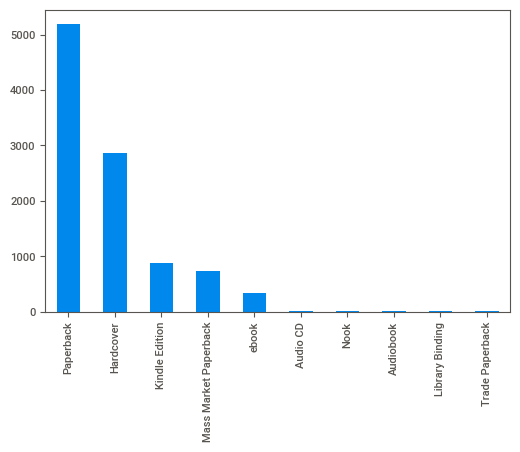

In [83]:
df['format'].value_counts()[:10].plot.bar()

<AxesSubplot:ylabel='Frequency'>

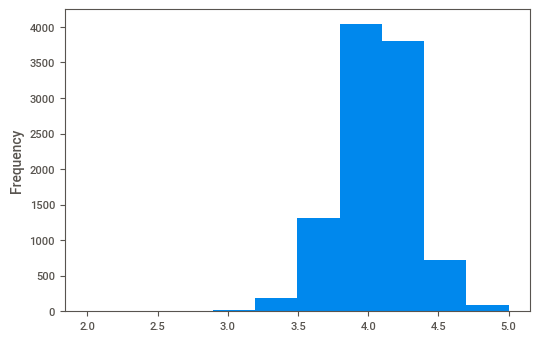

In [97]:
df['rating'].plot.hist()

In [105]:
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [107]:
from sklearn.neighbors import NearestNeighbors

In [116]:
df.columns

Index(['title', 'serie', 'author', 'language', 'genres', 'id', 'pages',
       'format', 'first_published', 'rating', 'rating_count',
       'five_stars_count', 'four_stars_count', 'three_stars_count',
       'two_stars_count', 'one_stars_count', 'review_count', 'awards',
       'awards_count', 'isbn_13', 'url'],
      dtype='object')

In [122]:
df1 = df.drop(['title', 'serie', 'author', 'language', 'genres', 'id', 'pages',
       'format', 'awards', 'isbn_13', 'url', 'pages', 'first_published'], axis=1)

In [123]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10190 entries, 0 to 10189
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rating             10190 non-null  float64
 1   rating_count       10190 non-null  int64  
 2   five_stars_count   10190 non-null  int64  
 3   four_stars_count   10190 non-null  int64  
 4   three_stars_count  10190 non-null  int64  
 5   two_stars_count    10190 non-null  int64  
 6   one_stars_count    10190 non-null  int64  
 7   review_count       10190 non-null  int64  
 8   awards_count       10190 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 716.6 KB


In [124]:
nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(df1)

In [151]:
distances, indices = nbrs.kneighbors(df[df['title'] == 'The Firm'].drop(['title', 'serie', 'author', 'language', 'genres', 'id', 'pages',
       'format', 'awards', 'isbn_13', 'url', 'pages', 'first_published'], axis=1))

In [153]:
indices

array([[ 395,  178,  130,   72,  480],
       [7364, 3536, 8905, 3901, 1872]], dtype=int64)

In [157]:
df.iloc[3901]

title                                                Stone of Farewell
serie                Stone of Farewell (Memory, Sorrow, and Thorn, #2)
author                                                    Tad Williams
language                                                       English
genres               ['Fantasy', 'Fiction', 'Fantasy', 'Epic Fantas...
id                                                               28689
pages                                                            608.0
format                                                       Paperback
first_published                                                 1990.0
rating                                                            4.06
rating_count                                                     47570
five_stars_count                                                 18192
four_stars_count                                                 17971
three_stars_count                                                 8336
two_st